In [1]:
# Untuk pengolahan data
import pandas as pd #untuk membuat tabel, mengubah dimensi data, mengecek data dll
import numpy as np #untuk operasi komputasi tipe data numerik seperti penjumlahan, pengurangan, perkalian dll
from sklearn import preprocessing #untuk preprocessing data
from sklearn.preprocessing import LabelEncoder #untuk data formatting atau encoding data

import random
import matplotlib.pyplot as plt 
import matplotlib

# 2. Data Collection

In [2]:
# loading a file
menu = pd.read_csv('df_menu.csv') #memuat dataset df_menu
order = pd.read_csv('df_order.csv') #memuat dataset df_order
resto = pd.read_csv('df_resto.csv') #memuat dataset df_resto

# 3. Data Clean & Exploration

## 3.1 Dataset Menu 

In [3]:
#Menampilkan 5 baris data menu teratas
menu.head() 

,menu_name,mitra_id,menu_id,menu_description,price,photo
0,Salad,80fb98d9-56fe-43ab-9082-341dfa02ae48,07e3b3aa-f7da-4c88-80fd-7f0ad0ef7463,vegan,15000,menu_images/oYmX9NRgtbKHCDuA8xZn3frH1XnZDfUCAM...
1,French Fries,7d5e7cbb-4e07-401f-8e79-81030add223c,0b44188f-a2d7-4cd1-b99e-6988a48bbb8d,enak,10000,menu_images/NswUr68piWSVfqmmvDFaDfkGfUtUHOxuCR...
2,Americano,418e22bb-e8d8-46d0-90fa-b54981f17035,0ba4575e-0d88-459f-b64a-ea4b54e4acce,mantao,15000,menu_images/eqwAJYTzclW9JEl32UvMUuX3Qn1Lb8nOgm...
3,Pop Mellow,80fb98d9-56fe-43ab-9082-341dfa02ae48,0bd7da5c-cd28-4d61-b307-b396ee075882,permen wassu,5000,menu_images/0Fh04S4CwWn25p3j7nDN3IQ2GoTkdqvmXr...
4,Emping,cbcc01d1-3076-497f-b595-c52737888058,0c07af3a-c98f-4511-bf98-cc30a8818f76,emping murah,1000,menu_images/F0NGTY02gOjeJjHczbm0QdC9MbBpZdbOwH...


In [4]:
#Menampilkan 5 baris data menu terbawah
menu.tail() 

,menu_name,mitra_id,menu_id,menu_description,price,photo
93,Manggo Espreso,418e22bb-e8d8-46d0-90fa-b54981f17035,f68bae98-bae9-415a-b19c-f47472fb5860,es kopi mangga,18000,menu_images/hDryHITEOyX5OdtNPQN4PdbOXIYG9WJxmO...
94,Bakso Mie Ayam,cbcc01d1-3076-497f-b595-c52737888058,f68c3fb1-24bb-4370-821f-43b8402d990b,ada baksonya,20000,menu_images/fJRuXUvlStHjqYGsNIwOlid8tvQ3lGdqFA...
95,Kids Meal 2,7d5e7cbb-4e07-401f-8e79-81030add223c,fb55584d-b945-4acf-bcb8-773181de396f,"minuman, daging ayam, nasi",30000,menu_images/g7cUudf1cuIwflU0ytVJRf2JuBOfG0nMwM...
96,Kerupuk Udang,cbcc01d1-3076-497f-b595-c52737888058,fd72f7e1-f3a9-484d-aa8e-f0c5b2d9e630,kerupuk rasa udang,1000,menu_images/LH3XAmFiC91IOeWF9e5K50QNInxvIgLoMT...
97,V60,418e22bb-e8d8-46d0-90fa-b54981f17035,fe40ff81-0e74-4889-8d63-f209f7c9387b,pendekar kopi pasti suka,22000,menu_images/Ye2nolCO8EMndlxTV7d5NbZUM6C898WHZS...


In [5]:
#Nomor index beserta tipe datanya
menu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   menu_name         98 non-null     object
 1   mitra_id          98 non-null     object
 2   menu_id           98 non-null     object
 3   menu_description  98 non-null     object
 4   price             98 non-null     int64 
 5   photo             98 non-null     object
dtypes: int64(1), object(5)
memory usage: 4.7+ KB


In [6]:
#Melihat jumlah baris dan kolom
menu.shape

(98, 6)

In [7]:
#Menunjukkan rangkuman statistik seperti rata-rata, median, dll pada kolom
menu.describe()

,price
count,98.000000
mean,13311.224490
std,9123.300663
min,500.000000
25%,6000.000000
50%,12000.000000
75%,18000.000000
max,60000.000000


In [8]:
#DataFrame - label untuk baris
menu.index

RangeIndex(start=0, stop=98, step=1)

In [9]:
#DataFrame - label untuk kolom 
menu.columns

Index(['menu_name', 'mitra_id', 'menu_id', 'menu_description', 'price',
       'photo'],
      dtype='object')

In [10]:
#DataFrame -  tipe data perkolom 
menu.dtypes

menu_name           object
mitra_id            object
menu_id             object
menu_description    object
price                int64
photo               object
dtype: object

In [11]:
#Mengecek apakah ada nilai NULL dengan keluaran boolean
pd.isnull(menu)

,menu_name,mitra_id,menu_id,menu_description,price,photo
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
93,False,False,False,False,False,False
94,False,False,False,False,False,False
95,False,False,False,False,False,False
96,False,False,False,False,False,False


In [12]:
menu.values

array([['Salad', '80fb98d9-56fe-43ab-9082-341dfa02ae48',
        '07e3b3aa-f7da-4c88-80fd-7f0ad0ef7463', 'vegan', 15000,
        'menu_images/oYmX9NRgtbKHCDuA8xZn3frH1XnZDfUCAMonSZXk.jpg'],
       ['French Fries', '7d5e7cbb-4e07-401f-8e79-81030add223c',
        '0b44188f-a2d7-4cd1-b99e-6988a48bbb8d', 'enak', 10000,
        'menu_images/NswUr68piWSVfqmmvDFaDfkGfUtUHOxuCRHgwGTd.jpg'],
       ['Americano', '418e22bb-e8d8-46d0-90fa-b54981f17035',
        '0ba4575e-0d88-459f-b64a-ea4b54e4acce', 'mantao', 15000,
        'menu_images/eqwAJYTzclW9JEl32UvMUuX3Qn1Lb8nOgmtmXx62.jpg'],
       ['Pop Mellow', '80fb98d9-56fe-43ab-9082-341dfa02ae48',
        '0bd7da5c-cd28-4d61-b307-b396ee075882', 'permen wassu', 5000,
        'menu_images/0Fh04S4CwWn25p3j7nDN3IQ2GoTkdqvmXrIV8rV8.jpg'],
       ['Emping', 'cbcc01d1-3076-497f-b595-c52737888058',
        '0c07af3a-c98f-4511-bf98-cc30a8818f76', 'emping murah', 1000,
        'menu_images/F0NGTY02gOjeJjHczbm0QdC9MbBpZdbOwHKmO0IX.jpg'],
       ['Porsi Dimsum

#### 3.1.1 Cari jumlah menu yang ada pada aplikasi EatAja

In [13]:
#Menghapus data menu_id yang duplikat
Menu = menu.drop_duplicates(['menu_id'])

#Export data ke format csv
Menu.to_csv('Menu.csv', index=False)

#Tampilkan dataset menu 
Menu

,menu_name,mitra_id,menu_id,menu_description,price,photo
0,Salad,80fb98d9-56fe-43ab-9082-341dfa02ae48,07e3b3aa-f7da-4c88-80fd-7f0ad0ef7463,vegan,15000,menu_images/oYmX9NRgtbKHCDuA8xZn3frH1XnZDfUCAM...
1,French Fries,7d5e7cbb-4e07-401f-8e79-81030add223c,0b44188f-a2d7-4cd1-b99e-6988a48bbb8d,enak,10000,menu_images/NswUr68piWSVfqmmvDFaDfkGfUtUHOxuCR...
2,Americano,418e22bb-e8d8-46d0-90fa-b54981f17035,0ba4575e-0d88-459f-b64a-ea4b54e4acce,mantao,15000,menu_images/eqwAJYTzclW9JEl32UvMUuX3Qn1Lb8nOgm...
3,Pop Mellow,80fb98d9-56fe-43ab-9082-341dfa02ae48,0bd7da5c-cd28-4d61-b307-b396ee075882,permen wassu,5000,menu_images/0Fh04S4CwWn25p3j7nDN3IQ2GoTkdqvmXr...
4,Emping,cbcc01d1-3076-497f-b595-c52737888058,0c07af3a-c98f-4511-bf98-cc30a8818f76,emping murah,1000,menu_images/F0NGTY02gOjeJjHczbm0QdC9MbBpZdbOwH...
...,...,...,...,...,...,...
93,Manggo Espreso,418e22bb-e8d8-46d0-90fa-b54981f17035,f68bae98-bae9-415a-b19c-f47472fb5860,es kopi mangga,18000,menu_images/hDryHITEOyX5OdtNPQN4PdbOXIYG9WJxmO...
94,Bakso Mie Ayam,cbcc01d1-3076-497f-b595-c52737888058,f68c3fb1-24bb-4370-821f-43b8402d990b,ada baksonya,20000,menu_images/fJRuXUvlStHjqYGsNIwOlid8tvQ3lGdqFA...
95,Kids Meal 2,7d5e7cbb-4e07-401f-8e79-81030add223c,fb55584d-b945-4acf-bcb8-773181de396f,"minuman, daging ayam, nasi",30000,menu_images/g7cUudf1cuIwflU0ytVJRf2JuBOfG0nMwM...
96,Kerupuk Udang,cbcc01d1-3076-497f-b595-c52737888058,fd72f7e1-f3a9-484d-aa8e-f0c5b2d9e630,kerupuk rasa udang,1000,menu_images/LH3XAmFiC91IOeWF9e5K50QNInxvIgLoMT...


In [14]:
#Jumlah menu yang terdapat pada aplikasi EatAja adalah 98
Menu['menu_id'].count()

98

#### 3.1.2 Cari jumlah mitra yang ada pada aplikasi EatAja

In [15]:
#Menghapus data mitra_id yang duplikat
Mitra = menu.drop_duplicates(['mitra_id'])

#Export data ke format csv
Mitra.to_csv('Mitra.csv', index=False)

#Tampilkan dataset menu
Mitra

,menu_name,mitra_id,menu_id,menu_description,price,photo
0,Salad,80fb98d9-56fe-43ab-9082-341dfa02ae48,07e3b3aa-f7da-4c88-80fd-7f0ad0ef7463,vegan,15000,menu_images/oYmX9NRgtbKHCDuA8xZn3frH1XnZDfUCAM...
1,French Fries,7d5e7cbb-4e07-401f-8e79-81030add223c,0b44188f-a2d7-4cd1-b99e-6988a48bbb8d,enak,10000,menu_images/NswUr68piWSVfqmmvDFaDfkGfUtUHOxuCR...
2,Americano,418e22bb-e8d8-46d0-90fa-b54981f17035,0ba4575e-0d88-459f-b64a-ea4b54e4acce,mantao,15000,menu_images/eqwAJYTzclW9JEl32UvMUuX3Qn1Lb8nOgm...
4,Emping,cbcc01d1-3076-497f-b595-c52737888058,0c07af3a-c98f-4511-bf98-cc30a8818f76,emping murah,1000,menu_images/F0NGTY02gOjeJjHczbm0QdC9MbBpZdbOwH...
7,Es Krim Coklat,3bea8419-3079-4c0c-af7c-9c026a52bead,11e6986d-866c-4705-ab79-39d628bc0291,es krim aiceee,4000,menu_images/mn9u1Fyo1VHGLrVk5siK3ARxeRQZW8Uu1Q...
9,Roti Bakar Blueberry,a3145899-f2b4-4863-b7d8-97602eb21a5a,1ecf30e0-394a-4c57-8521-d65378af2691,roti blueberry,4000,menu_images/T5EmBVxLqeZx0VUneNvQRWfVowFxtfUPtd...
16,Spicy Chicken Fingers,c819de10-ad4c-4377-9ab2-ae67b25298c0,29bfd303-51f3-4cce-8e2d-86c0e976123c,isinya 5,20000,menu_images/F4yudShhX3QNpN3O5TqtJQVvRPPhbQfDUD...
43,Update Testing Menu Name,efa8eeca-f9b1-40ce-ba15-6196d6cd0d5d,8100c366-ef52-43f8-bd78-bce945fd1db1,testing menu name,3000,menu_images/C3KvJrEM7c6QNjtkJZ0AMNUa7PipHYE4Ym...
86,Es Kelapa Muda,eac50c3b-c995-4b56-8dbb-e1299fcc9b58,dc74d628-461a-4139-91c1-154476fafef2,Segerrr,10000,menu_images/OzXisFzHDNTk1khHuCweA6Tc0wsfTgo44y...
91,Enak Sekali,5f39419d-2653-4405-9b98-9624023f4cb3,e82e0d8d-8244-430a-ba76-53d056402251,hshshd,18000,menu_images/hIhFiVT4TiijGXafzaWRE0npVqjeKyAjbR...


In [16]:
#Jumlah mitra yang terdapat pada aplikasi EatAja adalah 10
Mitra['mitra_id'].count()

10

## 3.2 Dataset Order

In [17]:
#Menampilkan 5 baris data order teratas
order.head()

,user_id,mitra_id,menu_id,rating
0,2894,c819de10-ad4c-4377-9ab2-ae67b25298c0,29bfd303-51f3-4cce-8e2d-86c0e976123c,5.0
1,1283,c819de10-ad4c-4377-9ab2-ae67b25298c0,a773f5a3-2af4-4c56-b5c8-268944e6a8d3,5.0
2,2727,a3145899-f2b4-4863-b7d8-97602eb21a5a,661000ac-309a-45b5-8d7b-41bab653e460,5.0
3,601,c819de10-ad4c-4377-9ab2-ae67b25298c0,29bfd303-51f3-4cce-8e2d-86c0e976123c,5.0
4,746,3bea8419-3079-4c0c-af7c-9c026a52bead,11e6986d-866c-4705-ab79-39d628bc0291,5.0


In [18]:
#Menampilkan 5 baris data order terbawah
order.tail()

,user_id,mitra_id,menu_id,rating
9995,2893,3bea8419-3079-4c0c-af7c-9c026a52bead,8be64a83-8489-4ec8-ab26-d20f1f95c509,5.0
9996,2356,7d5e7cbb-4e07-401f-8e79-81030add223c,e7419e7f-571e-4012-b1f0-14d20b7cd2de,4.0
9997,848,cbcc01d1-3076-497f-b595-c52737888058,b4d04c6e-f933-496c-a6b0-62cfb4d1b1e3,2.0
9998,1223,418e22bb-e8d8-46d0-90fa-b54981f17035,b0192632-5462-499c-9b56-08db6571bcc3,4.0
9999,2166,3bea8419-3079-4c0c-af7c-9c026a52bead,24901ad6-ccc9-4f48-bf7f-28cf3a79a881,3.0


In [19]:
#Nomor index beserta tipe datanya
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   10000 non-null  int64  
 1   mitra_id  10000 non-null  object 
 2   menu_id   10000 non-null  object 
 3   rating    10000 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 312.6+ KB


In [20]:
#Melihat jumlah baris dan kolom
order.shape

(10000, 4)

In [21]:
#Menunjukkan rangkuman statistik seperti rata-rata, median, dll pada kolom
order.describe()

,user_id,rating
count,10000.000000,10000.000000
mean,1507.625500,4.089700
std,871.861605,0.995466
min,2.000000,1.000000
25%,745.000000,4.000000
50%,1508.000000,4.000000
75%,2270.000000,5.000000
max,2999.000000,5.000000


In [22]:
#DataFrame - label untuk baris
order.index

RangeIndex(start=0, stop=10000, step=1)

In [23]:
#DataFrame - label untuk kolom 
order.columns

Index(['user_id', 'mitra_id', 'menu_id', 'rating'], dtype='object')

In [24]:
#DataFrame -  tipe data perkolom 
order.dtypes

user_id       int64
mitra_id     object
menu_id      object
rating      float64
dtype: object

In [25]:
#Mengecek apakah ada nilai NULL dengan keluaran boolean
pd.isnull(order)

,user_id,mitra_id,menu_id,rating
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
9995,False,False,False,False
9996,False,False,False,False
9997,False,False,False,False
9998,False,False,False,False


In [26]:
order.values

array([[2894, 'c819de10-ad4c-4377-9ab2-ae67b25298c0',
        '29bfd303-51f3-4cce-8e2d-86c0e976123c', 5.0],
       [1283, 'c819de10-ad4c-4377-9ab2-ae67b25298c0',
        'a773f5a3-2af4-4c56-b5c8-268944e6a8d3', 5.0],
       [2727, 'a3145899-f2b4-4863-b7d8-97602eb21a5a',
        '661000ac-309a-45b5-8d7b-41bab653e460', 5.0],
       ...,
       [848, 'cbcc01d1-3076-497f-b595-c52737888058',
        'b4d04c6e-f933-496c-a6b0-62cfb4d1b1e3', 2.0],
       [1223, '418e22bb-e8d8-46d0-90fa-b54981f17035',
        'b0192632-5462-499c-9b56-08db6571bcc3', 4.0],
       [2166, '3bea8419-3079-4c0c-af7c-9c026a52bead',
        '24901ad6-ccc9-4f48-bf7f-28cf3a79a881', 3.0]], dtype=object)

#### 3.2.1 Cari jumlah pengguna aplikasi EatApa yang melakukan pemesanan

In [27]:
#Menghapus data user_id yang duplikat
User = order.drop_duplicates(['user_id'])

#Export data ke format csv
User.to_csv('User.csv', index=False)

#Tampilkan dataset user yang melakukan pemesanan
User

,user_id,mitra_id,menu_id,rating
0,2894,c819de10-ad4c-4377-9ab2-ae67b25298c0,29bfd303-51f3-4cce-8e2d-86c0e976123c,5.0
1,1283,c819de10-ad4c-4377-9ab2-ae67b25298c0,a773f5a3-2af4-4c56-b5c8-268944e6a8d3,5.0
2,2727,a3145899-f2b4-4863-b7d8-97602eb21a5a,661000ac-309a-45b5-8d7b-41bab653e460,5.0
3,601,c819de10-ad4c-4377-9ab2-ae67b25298c0,29bfd303-51f3-4cce-8e2d-86c0e976123c,5.0
4,746,3bea8419-3079-4c0c-af7c-9c026a52bead,11e6986d-866c-4705-ab79-39d628bc0291,5.0
...,...,...,...,...
9931,1987,5f39419d-2653-4405-9b98-9624023f4cb3,e82e0d8d-8244-430a-ba76-53d056402251,4.0
9970,1115,a3145899-f2b4-4863-b7d8-97602eb21a5a,bf8775fe-74cf-44a1-823e-98c367c0e131,5.0
9972,2713,c819de10-ad4c-4377-9ab2-ae67b25298c0,3fde2fd3-ea0d-4e13-96c7-770f752354ff,3.0
9988,1660,418e22bb-e8d8-46d0-90fa-b54981f17035,8655e6cb-ec70-456d-bf6d-9721fc529218,5.0


In [28]:
#Jumlah pengguna yang melakukan pemesanan di aplikasi EatAja adalah 2890
User['user_id'].count()

2890

#### 3.2.2 Cari sum, count, mean rating setiap menu

In [29]:
#Menampilkan kolom menu_id dan rating saja
order[['menu_id','rating']]

,menu_id,rating
0,29bfd303-51f3-4cce-8e2d-86c0e976123c,5.0
1,a773f5a3-2af4-4c56-b5c8-268944e6a8d3,5.0
2,661000ac-309a-45b5-8d7b-41bab653e460,5.0
3,29bfd303-51f3-4cce-8e2d-86c0e976123c,5.0
4,11e6986d-866c-4705-ab79-39d628bc0291,5.0
...,...,...
9995,8be64a83-8489-4ec8-ab26-d20f1f95c509,5.0
9996,e7419e7f-571e-4012-b1f0-14d20b7cd2de,4.0
9997,b4d04c6e-f933-496c-a6b0-62cfb4d1b1e3,2.0
9998,b0192632-5462-499c-9b56-08db6571bcc3,4.0


In [30]:
#Menghitung banyak rating yang diberikan terhadap setiap menu
count_rating_by_menu = order.groupby('menu_id')[['rating']].count()

#Export data ke format csv
count_rating_by_menu.to_csv('count_rating_by_menu.csv', index=False)

#Tampilkan dataset count_rating_by_menu
count_rating_by_menu

,rating
menu_id,
07e3b3aa-f7da-4c88-80fd-7f0ad0ef7463,81
0b44188f-a2d7-4cd1-b99e-6988a48bbb8d,93
0ba4575e-0d88-459f-b64a-ea4b54e4acce,85
0bd7da5c-cd28-4d61-b307-b396ee075882,87
0c07af3a-c98f-4511-bf98-cc30a8818f76,113
...,...
f68bae98-bae9-415a-b19c-f47472fb5860,94
f68c3fb1-24bb-4370-821f-43b8402d990b,84
fb55584d-b945-4acf-bcb8-773181de396f,98


In [31]:
#Percentil banyak rating per menu
count_rating_by_menu.describe()

,rating
count,98.000000
mean,102.040816
std,9.845108
min,79.000000
25%,97.000000
50%,103.000000
75%,108.750000
max,124.000000


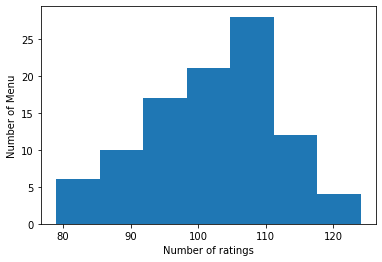

In [32]:
plt.hist(count_rating_by_menu, bins = 7) 
plt.xlabel("Number of ratings") 
plt.ylabel("Number of Menu") 
plt.show()

In [33]:
#Menghitung banyak rating yang diberikan setiap user
count_rating_by_user = order.groupby('user_id')[['rating']].count()

#Export data ke format csv
count_rating_by_user.to_csv('count_rating_by_user.csv', index=False)

#Tampilkan dataset count_rating_by_user
count_rating_by_user

,rating
user_id,
2,3
3,4
4,2
5,1
6,2
...,...
2995,4
2996,7
2997,1


In [34]:
count_rating_by_user.describe()

,rating
count,2890.000000
mean,3.460208
std,1.779652
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,13.000000


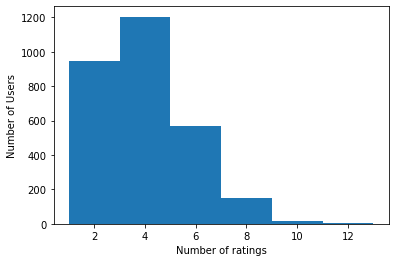

In [35]:
plt.hist(count_rating_by_user, bins = 6) 
plt.xlabel("Number of ratings") 
plt.ylabel("Number of Users") 
plt.show()

In [36]:
#Menjumlahkan rating yang diberikan terhadap setiap menu
sum_rating_by_menu = order.groupby('menu_id')[['rating']].sum()

#Export data ke format csv
sum_rating_by_menu.to_csv('sum_rating_by_menu.csv', index=False)

#Tampilkan dataset sum_rating_by_menu
sum_rating_by_menu

,rating
menu_id,
07e3b3aa-f7da-4c88-80fd-7f0ad0ef7463,334.0
0b44188f-a2d7-4cd1-b99e-6988a48bbb8d,403.0
0ba4575e-0d88-459f-b64a-ea4b54e4acce,338.0
0bd7da5c-cd28-4d61-b307-b396ee075882,355.0
0c07af3a-c98f-4511-bf98-cc30a8818f76,460.0
...,...
f68bae98-bae9-415a-b19c-f47472fb5860,395.0
f68c3fb1-24bb-4370-821f-43b8402d990b,349.0
fb55584d-b945-4acf-bcb8-773181de396f,404.0


In [37]:
#Rata rata  rating yang diberikan terhadap setiap menu
mean_rating_by_menu = order.groupby('menu_id')[['rating']].mean()

#Export data ke format csv
mean_rating_by_menu.to_csv('mean_rating_by_menu.csv', index=False)

#Tampilkan dataset mean_rating_by_menu
mean_rating_by_menu

,rating
menu_id,
07e3b3aa-f7da-4c88-80fd-7f0ad0ef7463,4.123457
0b44188f-a2d7-4cd1-b99e-6988a48bbb8d,4.333333
0ba4575e-0d88-459f-b64a-ea4b54e4acce,3.976471
0bd7da5c-cd28-4d61-b307-b396ee075882,4.080460
0c07af3a-c98f-4511-bf98-cc30a8818f76,4.070796
...,...
f68bae98-bae9-415a-b19c-f47472fb5860,4.202128
f68c3fb1-24bb-4370-821f-43b8402d990b,4.154762
fb55584d-b945-4acf-bcb8-773181de396f,4.122449


In [38]:
#percentil rata rata rating per menu
mean_rating_by_menu.describe()

,rating
count,98.000000
mean,4.089607
std,0.102903
min,3.801887
25%,4.030232
50%,4.085714
75%,4.153455
max,4.333333


In [39]:
#Menu dengan rata rata rating diatas 5
menu_rating_bagus = mean_rating_by_menu[mean_rating_by_menu['rating']>=5][['rating']]

#Export data ke format csv
menu_rating_bagus.to_csv('menu_rating_bagus.csv', index=False)

#Tampilkan dataset menu_rating_bagus
menu_rating_bagus

,rating
menu_id,


In [40]:
#Jumlah menu dengan rata rata rating diatas angka 5 adalah 98 menu
menu_rating_bagus['rating'].count()

0

In [41]:
#Menu dengan rata rata rating dibawah 3
menu_rating_buruk = mean_rating_by_menu[mean_rating_by_menu['rating']<3][['rating']]

#Export data ke format csv
menu_rating_buruk.to_csv('menu_rating_buruk.csv', index=False)

#Tampilkan dataset menu_rating_buruk
menu_rating_buruk

,rating
menu_id,


In [42]:
#Jumlah menu dengan rata rata rating dibawah angka 3 adalah 0 menu
menu_rating_buruk['rating'].count()

0

#### 3.2.4 Cari jumlah transaksi yang di lakukan setiap user

In [43]:
#Menghitung jumlah transaksi yang dilakukan setiap pengguna
count_transaction_by_user = order.groupby('user_id')[['rating']].count()

#Menambahkan kolom mitra_id, menu_id, rating 
count_transaction_by_user.reset_index() #untuk mengembalikan ke default index
count_transaction_by_user.rename(columns={'rating':'count_rating'}, inplace=True) # mengganti nama colom rating dan jumlah rating
result_count_transaction_by_user = pd.merge(order, count_transaction_by_user, on = 'user_id') #untuk menggabungkan data pada kolom

#Export data ke format csv
result_count_transaction_by_user.to_csv('result_count_transaction_by_user.csv', index=False)

#Tampilkan data result_count_transaction_by_user
result_count_transaction_by_user

,user_id,mitra_id,menu_id,rating,count_rating
0,2894,c819de10-ad4c-4377-9ab2-ae67b25298c0,29bfd303-51f3-4cce-8e2d-86c0e976123c,5.0,5
1,2894,cbcc01d1-3076-497f-b595-c52737888058,10962281-8cad-4b29-b28c-2d38ef999f8f,4.0,5
2,2894,3bea8419-3079-4c0c-af7c-9c026a52bead,9a0ec016-1b71-4091-95f1-2d968a5bb8e0,3.0,5
3,2894,a3145899-f2b4-4863-b7d8-97602eb21a5a,2db1318b-8c0f-4281-aa5e-0815746a04e8,4.0,5
4,2894,cbcc01d1-3076-497f-b595-c52737888058,e2d195bf-ecbe-40a3-9114-f7c69efd05f0,3.0,5
...,...,...,...,...,...
9995,1987,5f39419d-2653-4405-9b98-9624023f4cb3,e82e0d8d-8244-430a-ba76-53d056402251,4.0,1
9996,1115,a3145899-f2b4-4863-b7d8-97602eb21a5a,bf8775fe-74cf-44a1-823e-98c367c0e131,5.0,1
9997,2713,c819de10-ad4c-4377-9ab2-ae67b25298c0,3fde2fd3-ea0d-4e13-96c7-770f752354ff,3.0,1
9998,1660,418e22bb-e8d8-46d0-90fa-b54981f17035,8655e6cb-ec70-456d-bf6d-9721fc529218,5.0,1


In [44]:
#Percentil banyak transaksi yang dilakukan oleh setiap pengguna
result_count_transaction_by_user.describe()

,user_id,rating,count_rating
count,10000.000000,10000.000000,10000.000000
mean,1507.625500,4.089700,4.375200
std,871.861605,0.995466,1.870982
min,2.000000,1.000000,1.000000
25%,745.000000,4.000000,3.000000
50%,1508.000000,4.000000,4.000000
75%,2270.000000,5.000000,6.000000
max,2999.000000,5.000000,13.000000


## 3.3 Dataset Resto

In [45]:
#Menampilkan 5 baris data resto teratas
resto.head()

,id,restaurant_name,address,open,close,restaurant_description,restaurant_type,isStoreOpen,photo,isPayLater
0,80fb98d9-56fe-43ab-9082-341dfa02ae48,Jago Coffee,"Jl. Bandung Sukabirus, no 21",09:00,23:59,jago kopi nya indonesia dong,Cafe,1,mitra_images/iqreVwnVVlJSa9c5DsPl3P4zGAX8dKn5F...,0
1,eac50c3b-c995-4b56-8dbb-e1299fcc9b58,Mie Ayam Yuda,"SukaBirus, Bandung, no.40",06:30,18:30,Enak Dah Pokoknya,Fast Food,0,mitra_images/uiG8nPr3NBdibjHgCMiSTzeHmWjHVm51F...,0
2,c819de10-ad4c-4377-9ab2-ae67b25298c0,Mcd Bubat,"Jl. Bandung Sukabirus, no 21",09:00,23:59,mcd bubat lokasi bandung,Fast Food,1,mitra_images/OwOjcrST0MHF2xKdO3Nts29OtvmmEOsng...,0
3,a3145899-f2b4-4863-b7d8-97602eb21a5a,Santuy Kopi,"Jl. Bandung Sukabirus, no 21",09:00,23:59,Santuy kopi lokasi bandung,Cafe,1,mitra_images/EVbLRyAmAu8mvXc0HBRIRoTLzqBwqdGhJ...,0
4,418e22bb-e8d8-46d0-90fa-b54981f17035,Binkbink Dimsum,"Jl tirtawangi raya no 77, desa lengkong, cipag...",13:00,23:59,Tempat bercakap sambil menyeduh kopi dan dimsu...,Fast Food,1,mitra_images/wTMd5ufou6HRmqxZR29JDQyK0irbFnvJ9...,0


In [46]:
#Menampilkan 5 baris data resto terbawah
resto.tail() 

,id,restaurant_name,address,open,close,restaurant_description,restaurant_type,isStoreOpen,photo,isPayLater
3,a3145899-f2b4-4863-b7d8-97602eb21a5a,Santuy Kopi,"Jl. Bandung Sukabirus, no 21",09:00,23:59,Santuy kopi lokasi bandung,Cafe,1,mitra_images/EVbLRyAmAu8mvXc0HBRIRoTLzqBwqdGhJ...,0
4,418e22bb-e8d8-46d0-90fa-b54981f17035,Binkbink Dimsum,"Jl tirtawangi raya no 77, desa lengkong, cipag...",13:00,23:59,Tempat bercakap sambil menyeduh kopi dan dimsu...,Fast Food,1,mitra_images/wTMd5ufou6HRmqxZR29JDQyK0irbFnvJ9...,0
5,7d5e7cbb-4e07-401f-8e79-81030add223c,Richeese Factory,"Jl. Bandung Sukabirus, no 21",09:00,23:59,richeese factory bubat lokasi bandung,Fast Food,1,mitra_images/7HgruGqQZnLdsaS8ljdBY2FshIeh5DC8O...,0
6,3bea8419-3079-4c0c-af7c-9c026a52bead,Gadang Padang,"Jl. Bandung Sukabirus, no 21",09:00,23:59,Gadang padang enak,Makanan Berat,1,mitra_images/T3IhnD1uuRnTNHtrLqM5gt4jYNaiw7JQj...,0
7,cbcc01d1-3076-497f-b595-c52737888058,Bahri Bakmieayam,"Jl. Bandung Sukabirus, no 21",09:00,23:59,Baso mie pak Marno terkenal enak se-Bandung raya,Makanan Berat,1,mitra_images/kKdqJZYS8UQh9GHjn7uI7yPuBR8Ohn9H7...,0


In [47]:
#Nomor index beserta tipe datanya
resto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      8 non-null      object
 1   restaurant_name         8 non-null      object
 2   address                 8 non-null      object
 3   open                    8 non-null      object
 4   close                   8 non-null      object
 5   restaurant_description  8 non-null      object
 6   restaurant_type         8 non-null      object
 7   isStoreOpen             8 non-null      int64 
 8   photo                   8 non-null      object
 9   isPayLater              8 non-null      int64 
dtypes: int64(2), object(8)
memory usage: 768.0+ bytes


In [48]:
#Melihat jumlah baris dan kolom
resto.shape

(8, 10)

In [49]:
#Menunjukkan rangkuman statistik seperti rata-rata, median, dll pada kolom
resto.describe()

,isStoreOpen,isPayLater
count,8.000000,8.0
mean,0.875000,0.0
std,0.353553,0.0
min,0.000000,0.0
25%,1.000000,0.0
50%,1.000000,0.0
75%,1.000000,0.0
max,1.000000,0.0


In [50]:
#DataFrame - label untuk baris
resto.index

RangeIndex(start=0, stop=8, step=1)

In [51]:
#DataFrame - label untuk kolom 
resto.columns

Index(['id', 'restaurant_name', 'address', 'open', 'close',
       'restaurant_description', 'restaurant_type', 'isStoreOpen', 'photo',
       'isPayLater'],
      dtype='object')

In [52]:
#DataFrame -  tipe data perkolom 
resto.dtypes

id                        object
restaurant_name           object
address                   object
open                      object
close                     object
restaurant_description    object
restaurant_type           object
isStoreOpen                int64
photo                     object
isPayLater                 int64
dtype: object

In [53]:
#Mengecek apakah ada nilai NULL dengan keluaran boolean
pd.isnull(resto)

,id,restaurant_name,address,open,close,restaurant_description,restaurant_type,isStoreOpen,photo,isPayLater
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False


In [54]:
resto.values

array([['80fb98d9-56fe-43ab-9082-341dfa02ae48', 'Jago Coffee',
        'Jl. Bandung Sukabirus, no 21', '09:00', '23:59',
        'jago kopi nya indonesia dong', 'Cafe', 1,
        'mitra_images/iqreVwnVVlJSa9c5DsPl3P4zGAX8dKn5Fy8xY9vL.jpg', 0],
       ['eac50c3b-c995-4b56-8dbb-e1299fcc9b58', 'Mie Ayam Yuda',
        'SukaBirus, Bandung, no.40', '06:30', '18:30',
        'Enak Dah Pokoknya', 'Fast Food', 0,
        'mitra_images/uiG8nPr3NBdibjHgCMiSTzeHmWjHVm51FnyRzNwt.jpg', 0],
       ['c819de10-ad4c-4377-9ab2-ae67b25298c0', 'Mcd Bubat',
        'Jl. Bandung Sukabirus, no 21', '09:00', '23:59',
        'mcd bubat lokasi bandung', 'Fast Food', 1,
        'mitra_images/OwOjcrST0MHF2xKdO3Nts29OtvmmEOsngeFI4vOT.jpg', 0],
       ['a3145899-f2b4-4863-b7d8-97602eb21a5a', 'Santuy Kopi',
        'Jl. Bandung Sukabirus, no 21', '09:00', '23:59',
        'Santuy kopi lokasi bandung', 'Cafe', 1,
        'mitra_images/EVbLRyAmAu8mvXc0HBRIRoTLzqBwqdGhJUxBIvEz.jpg', 0],
       ['418e22bb-e8d8-46d0-90

#### 3.3.1 Cari jumlah Restaurant pada aplikasi EatApa

In [55]:
#Hapus data nama restoran yang duplikat
Restaurant = resto.drop_duplicates(['restaurant_name'])

#Export data ke format csv
Restaurant.to_csv('Restaurant.csv', index=False)

#Tampilkan dataset restaurant
Restaurant

,id,restaurant_name,address,open,close,restaurant_description,restaurant_type,isStoreOpen,photo,isPayLater
0,80fb98d9-56fe-43ab-9082-341dfa02ae48,Jago Coffee,"Jl. Bandung Sukabirus, no 21",09:00,23:59,jago kopi nya indonesia dong,Cafe,1,mitra_images/iqreVwnVVlJSa9c5DsPl3P4zGAX8dKn5F...,0
1,eac50c3b-c995-4b56-8dbb-e1299fcc9b58,Mie Ayam Yuda,"SukaBirus, Bandung, no.40",06:30,18:30,Enak Dah Pokoknya,Fast Food,0,mitra_images/uiG8nPr3NBdibjHgCMiSTzeHmWjHVm51F...,0
2,c819de10-ad4c-4377-9ab2-ae67b25298c0,Mcd Bubat,"Jl. Bandung Sukabirus, no 21",09:00,23:59,mcd bubat lokasi bandung,Fast Food,1,mitra_images/OwOjcrST0MHF2xKdO3Nts29OtvmmEOsng...,0
3,a3145899-f2b4-4863-b7d8-97602eb21a5a,Santuy Kopi,"Jl. Bandung Sukabirus, no 21",09:00,23:59,Santuy kopi lokasi bandung,Cafe,1,mitra_images/EVbLRyAmAu8mvXc0HBRIRoTLzqBwqdGhJ...,0
4,418e22bb-e8d8-46d0-90fa-b54981f17035,Binkbink Dimsum,"Jl tirtawangi raya no 77, desa lengkong, cipag...",13:00,23:59,Tempat bercakap sambil menyeduh kopi dan dimsu...,Fast Food,1,mitra_images/wTMd5ufou6HRmqxZR29JDQyK0irbFnvJ9...,0
5,7d5e7cbb-4e07-401f-8e79-81030add223c,Richeese Factory,"Jl. Bandung Sukabirus, no 21",09:00,23:59,richeese factory bubat lokasi bandung,Fast Food,1,mitra_images/7HgruGqQZnLdsaS8ljdBY2FshIeh5DC8O...,0
6,3bea8419-3079-4c0c-af7c-9c026a52bead,Gadang Padang,"Jl. Bandung Sukabirus, no 21",09:00,23:59,Gadang padang enak,Makanan Berat,1,mitra_images/T3IhnD1uuRnTNHtrLqM5gt4jYNaiw7JQj...,0
7,cbcc01d1-3076-497f-b595-c52737888058,Bahri Bakmieayam,"Jl. Bandung Sukabirus, no 21",09:00,23:59,Baso mie pak Marno terkenal enak se-Bandung raya,Makanan Berat,1,mitra_images/kKdqJZYS8UQh9GHjn7uI7yPuBR8Ohn9H7...,0


In [56]:
#Jumlah restaurant yang terdapat pada aplikasi EatAja adalah 8
Restaurant['restaurant_name'].count()

8

# 4. Data Formatting

In [57]:
#User yang memberikan banyak rating minimal 5 kali
user_give_5_or_more_ratings = result_count_transaction_by_user[result_count_transaction_by_user['count_rating']>=5]
user_give_5_or_more_ratings.drop('mitra_id', axis=1, inplace=True)

#Tampilkan data user_give_5_or_more_ratings
user_give_5_or_more_ratings

C:\Users\Elsa\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,user_id,menu_id,rating,count_rating
0,2894,29bfd303-51f3-4cce-8e2d-86c0e976123c,5.0,5
1,2894,10962281-8cad-4b29-b28c-2d38ef999f8f,4.0,5
2,2894,9a0ec016-1b71-4091-95f1-2d968a5bb8e0,3.0,5
3,2894,2db1318b-8c0f-4281-aa5e-0815746a04e8,4.0,5
4,2894,e2d195bf-ecbe-40a3-9114-f7c69efd05f0,3.0,5
...,...,...,...,...
9804,630,fe40ff81-0e74-4889-8d63-f209f7c9387b,4.0,5
9805,630,dc74d628-461a-4139-91c1-154476fafef2,2.0,5
9806,630,d0b9e8cc-dcb1-44fc-8195-62f97a8dbc95,2.0,5
9807,630,69ee83ee-3a10-48f9-b115-9d99111f9900,5.0,5


In [58]:
#Menghitung jumlah user yang memberikan rating sebanyak 5
count_user_give_5_or_more_ratings = user_give_5_or_more_ratings.drop_duplicates(['user_id'])

#Export data ke format csv
count_user_give_5_or_more_ratings.to_csv('count_user_give_5_or_more_ratings.csv', index=False)

#Tampilkan dataset count_user_give_5_or_more_ratings
count_user_give_5_or_more_ratings

,user_id,menu_id,rating,count_rating
0,2894,29bfd303-51f3-4cce-8e2d-86c0e976123c,5.0,5
7,2727,661000ac-309a-45b5-8d7b-41bab653e460,5.0,8
17,746,11e6986d-866c-4705-ab79-39d628bc0291,5.0,6
23,2663,661000ac-309a-45b5-8d7b-41bab653e460,2.0,7
30,301,bf8775fe-74cf-44a1-823e-98c367c0e131,4.0,5
...,...,...,...,...
9685,1959,a2ae096e-49a2-45fe-8a66-494b97366482,5.0,5
9702,1607,d377038a-b4b0-412f-a73e-1891e1b9b49d,3.0,6
9708,2331,90412858-d297-4c4f-aa1d-ab74623d16ac,3.0,5
9790,2379,a773f5a3-2af4-4c56-b5c8-268944e6a8d3,5.0,5


In [59]:
#Encoding data untuk menu_id
le = preprocessing.LabelEncoder()
user_give_5_or_more_ratings['menu_id'] = le.fit_transform(user_give_5_or_more_ratings['menu_id'])
user_give_5_or_more_ratings.to_csv('user_give_5_or_more_ratings.csv', index=False)
user_give_5_or_more_ratings

C:\Users\Elsa\AppData\Local\Temp/ipykernel_3512/1935577494.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_give_5_or_more_ratings['menu_id'] = le.fit_transform(user_give_5_or_more_ratings['menu_id'])


,user_id,menu_id,rating,count_rating
0,2894,16,5.0,5
1,2894,6,4.0,5
2,2894,58,3.0,5
3,2894,19,4.0,5
4,2894,87,3.0,5
...,...,...,...,...
9804,630,97,4.0,5
9805,630,86,2.0,5
9806,630,78,2.0,5
9807,630,37,5.0,5


# 5. Data Splitting and Model Training

In [60]:
#Membuat list user_id 
list_user_id = user_give_5_or_more_ratings['user_id']

#Export data ke format csv
list_user_id.to_csv('list_user_id.csv', index=False)

#Tampilkan data list_user_id
list_user_id

0       2894
1       2894
2       2894
3       2894
4       2894
        ... 
9804     630
9805     630
9806     630
9807     630
9808     630
Name: user_id, Length: 4351, dtype: int64

In [61]:
#Membuat list menu_id
list_menu_id = user_give_5_or_more_ratings['menu_id']

#Export data ke format csv
list_menu_id.to_csv('list_menu_id.csv', index=False)

#Tampilkan data list_menu_id
list_menu_id

0       16
1        6
2       58
3       19
4       87
        ..
9804    97
9805    86
9806    78
9807    37
9808    19
Name: menu_id, Length: 4351, dtype: int32

In [62]:
#pip install findspark

In [63]:
#Findspark untuk mencari direktori di mana PySpark terinstall
# Import findspark
import findspark
findspark.init()

In [64]:
#pip install pyspark

In [65]:
#pip install sparksql-magic

In [66]:
#pip install pyspark[sql]

In [67]:
#pip install pyspark[pandas_on_spark] plotly

In [68]:
# Import PySpark
import pyspark
from pyspark.sql import SparkSession
from pyspark import SparkContext

#Create SparkSession
spark = SparkSession \
    .builder \
    .master("local") \
    .getOrCreate()

In [69]:
from sklearn.model_selection import StratifiedKFold
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
skf.get_n_splits(user_give_5_or_more_ratings, list_user_id)

for train_index, test_index in skf.split(user_give_5_or_more_ratings, list_user_id):
    X_train, X_test = user_give_5_or_more_ratings.iloc[train_index], user_give_5_or_more_ratings.iloc[test_index]
    
    #Export data ke format csv
    X_train.to_csv('X_train.csv', index=False)
    X_test.to_csv('X_test.csv', index=False)
    
    #Bikin dataset ke spark
    rating_train = spark.createDataFrame(X_train)
    rating_test = spark.createDataFrame(X_test)
    
    # initialize the ALS model 
    als_model = ALS(userCol="user_id", itemCol="menu_id", ratingCol="rating", coldStartStrategy="drop", seed=1)
    
    # evaluator
    evaluator1 = RegressionEvaluator(metricName="mae", labelCol="rating", predictionCol="prediction")
    #evaluator2 = RegressionEvaluator(metricName="rmse", labelCol="rating", predictionCol="prediction")
    
    # isi parameter
    final_als = ALS(
        maxIter=5,
        rank=1,
        regParam=0.04,
        userCol="user_id",
        itemCol="menu_id",
        ratingCol="rating",
        coldStartStrategy="drop",
        seed=1
    )
    model = final_als.fit(rating_train)
    test_predictions = model.transform(rating_test)
    mae = evaluator1.evaluate(test_predictions)
    #rmse = evaluator2.evaluate(test_predictions)
    print("Mean Absolute Error="+str(mae))
    #print("Root mean square error="+str(rmse))

Mean Absolute Error=0.8820941259338169
Mean Absolute Error=0.9113940096449578
Mean Absolute Error=0.894111186745523
Mean Absolute Error=0.9045848205171783
Mean Absolute Error=0.8911023159136717


In [70]:
final_als = ALS(
    maxIter=5,
    rank=1,
    regParam=0.04,
    userCol="user_id",
    itemCol="menu_id",
    ratingCol="rating",
    coldStartStrategy="drop",
    seed=1
)

rating_train = spark.createDataFrame(user_give_5_or_more_ratings) 
model = final_als.fit(rating_train)

In [71]:
test_predictions.show()

+-------+-------+------+------------+----------+
|user_id|menu_id|rating|count_rating|prediction|
+-------+-------+------+------------+----------+
|    833|     34|   5.0|           6| 4.7659354|
|   1342|     90|   5.0|           5| 3.4557886|
|   2142|     40|   5.0|           6| 4.3169603|
|   1645|     71|   5.0|           5| 4.1858983|
|    463|     76|   3.0|           7|  4.370717|
|   2366|     24|   4.0|           5| 3.3285754|
|   1959|     34|   4.0|           5|   3.56417|
|    243|      3|   4.0|           5|  4.031313|
|    897|     28|   4.0|           5| 3.8812852|
|   2235|     73|   3.0|           5| 4.7371464|
|   1270|     20|   4.0|          11| 3.5979373|
|   1270|     53|   4.0|          11| 3.5684726|
|   1143|     18|   5.0|           8| 3.4595501|
|   1322|     97|   3.0|           6|  4.400653|
|   1322|     91|   3.0|           6| 4.3038216|
|   2776|     76|   4.0|           6|  4.419832|
|   2821|     45|   5.0|           7|  4.467687|
|   2996|     59|   

In [72]:
# Generate top 10 menu recommendations for each user
userRecs = model.recommendForAllUsers(5)

#Rekomendasi 10 menu untuk setiap user
userRecs.show(truncate=False)

C:\Spark\spark-3.2.1-bin-hadoop3.2\python\pyspark\sql\context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


+-------+------------------------------------------------------------------------------------+
|user_id|recommendations                                                                     |
+-------+------------------------------------------------------------------------------------+
|9      |[{1, 4.30717}, {60, 4.2877736}, {25, 4.2222238}, {19, 4.1985903}, {12, 4.1701937}]  |
|11     |[{1, 3.9441762}, {60, 3.9264145}, {25, 3.8663893}, {19, 3.8447475}, {12, 3.8187437}]|
|19     |[{1, 4.69109}, {60, 4.6699643}, {25, 4.5985723}, {19, 4.572832}, {12, 4.541904}]    |
|20     |[{1, 4.186361}, {60, 4.1675086}, {25, 4.1037974}, {19, 4.0808268}, {12, 4.0532265}] |
|26     |[{1, 4.4554706}, {60, 4.435406}, {25, 4.3675995}, {19, 4.3431525}, {12, 4.313778}]  |
|29     |[{1, 2.9831405}, {60, 2.9697063}, {25, 2.9243069}, {19, 2.9079382}, {12, 2.8882706}]|
|31     |[{1, 4.4824133}, {60, 4.4622273}, {25, 4.394011}, {19, 4.3694158}, {12, 4.339864}]  |
|36     |[{1, 4.713795}, {60, 4.6925673}, {25, 4.6

In [ ]:
userRecs.toPandas().to_csv("recommendation_result.csv", index=False)